In [6]:
from src.Utilities import load_and_clean
from src.Metrics import (
    colums_description,
    proportion_of_disease,
    sample_disease,
    compare_disease,
    bootstrap,
    ci_mean_normal,
    smoker_t_test,
)
from src.Viz import plots
import numpy as np


df = load_and_clean("Data/health_study_dataset.csv")
cols = ["age", "weight", "height", "systolic_bp", "cholesterol"]
stats_df = colums_description(df, cols)
stats_df_rounded = stats_df.round(2)
induviduals= len(df)
sick_individuals= df["disease"].sum()
p_real = proportion_of_disease(df)
p_sim = sample_disease(df, n=1000, seed=42)
diff, rel_diff = compare_disease(p_real, p_sim)
lower,upper,boot_means = bootstrap(df,B=3000)
x = df["systolic_bp"].dropna().to_numpy()
lo, hi, mean_x, s, n = ci_mean_normal(x)


t_stat, p_val, t_stat_w, p_val_w = smoker_t_test(df)

print(f"Antal personer i datasetet: {induviduals}")
print(f"Antalet sjuka: {sick_individuals}")
print("\n------------------------------------------\n")
print(stats_df_rounded)
print("\n-------------------------------------------\n")



Antal personer i datasetet: 800
Antalet sjuka: 47

------------------------------------------

               mean  median    min     max
age           49.43   50.00   18.0   90.00
weight        73.41   73.20   33.7  114.40
height       171.85  171.35  144.4  200.40
systolic_bp  149.18  149.40  106.8  185.90
cholesterol    4.93    4.97    2.5    7.88

-------------------------------------------



In [ ]:
print(f"Verklig andel sjukdom: {p_real*100:.2f}%")
print(f"Simulerad andel sjukdom: {p_sim*100:.2f}%")
print(f"Skillnad mellan verklig och simulerad: {rel_diff:.2f}%")
print("\n------------------------------------------\n")
print("Normalapproximation 95% CI för systoliskt blodtryck")
print(f"Stickprovsstorlek (n):          {n}")
print(f"Stickprovsmedelvärde:          {mean_x:.2f}")
print(f"Stickprovs standardavvikelse:    {s:.2f}")
print(f"95% konfidensintervall:         {lo:.2f}, {hi:.2f}")
print("\n------------------------------------------\n")
print("Bootstrap 95% CI för Systoliskt blodtryck:",(round(float(lower), 1), round(float(upper), 1)))


print(f"Standard t-test: T = {t_stat:.3f}, P = {p_val:.4f}")
print(f"Welch t-test:    T = {t_stat_w:.3f}, P = {p_val_w:.4f}")

Verklig andel sjukdom: 5.88%
Simulerad andel sjukdom: 6.30%
Skillnad mellan verklig och simulerad: 7.23%

------------------------------------------

Normalapproximation 95% CI för systoliskt blodtryck
Stickprovsstorlek (n):          800
Stickprovsmedelvärde:          149.18
Stickprovsstandardavvikelse:    12.79
95% konfidensintervall:         147.22, 151.14

------------------------------------------

Bootstrap 95% CI för Systoliskt blodtryck: (148.3, 150.1)
Standard t-test: T = 0.461, P = 0.6450
Welch t-test:    T = 0.450, P = 0.6527


# Slutsats
Baserat på t_testerna som jag gjort har jag kommit fram till att rökare och icke rökare har i stortsätt samma systoliska blodtryck. 
Statistiken visar liknande resultat under båda testerna. Med det kan jag säga att rökning inte påverkar blodtrycket just i detta dataset.

Samma gäller när vi kollar på medelvärdet för systolisk blodtryck med hjälp av bootstrap och normalapproximation. Jag kommer fram till liknade resultat vilket innebär att båda metoderna går att använda som en uppskattning av det sanna medelvärdet.
Datasetet följer normalfördelningen bra därav fungerar båda metoderna.

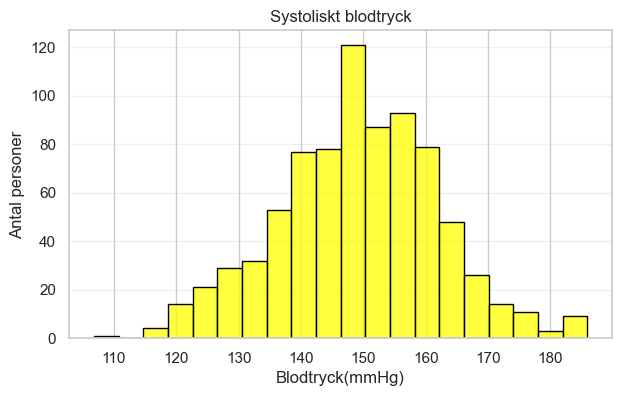

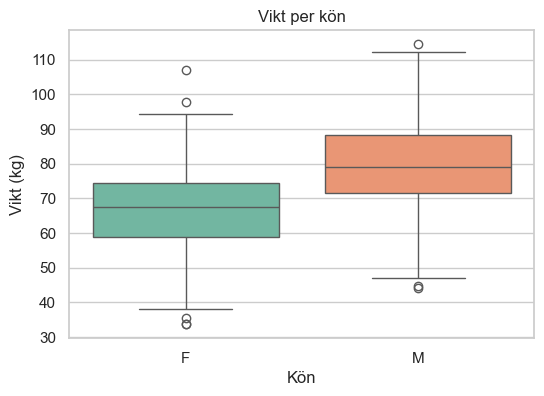

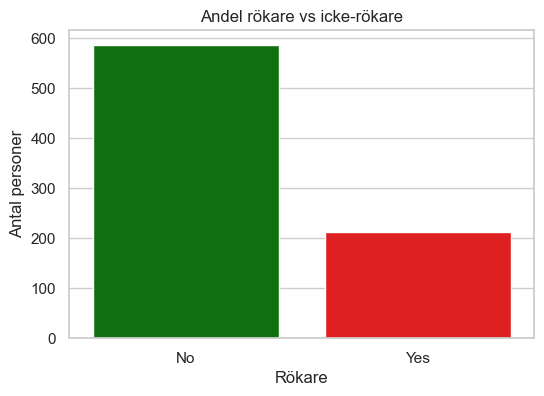

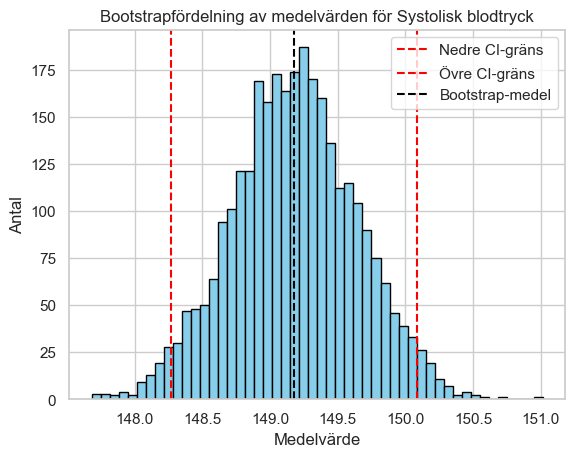

In [9]:
(plots(df))